# Analyze the results

Analyze the results of previously conducted experiments.

The results are stored in serialized dictionaries (pickled).

Results is a dictionary, with entries like the following "Experiment key": Dictionary of raw predictions.


The raw prediction dictionary is itself a dictionary with as many entries as repetitions.

For each repetition we have a dictionary with as many entries as folds.

Associated with the number of the fold we have the values of the real classes and the predicted classes.

Storing all the real classes and predictions allows you to perform all kinds of analysis on the results without the need to repeat the experiments-

**You need the results dictionary that is created with the "Create datasets and run experiments" notebook**

```Python
res_dict = load_results()
res_dict[('LogisticRegression','Morpho')]
```

```
{0: {0: (array(['Globular', 'Globular', 'Globular', 'Globular', 'Globular',
          'Globular', 'Elongate', 'Elongate', 'Elongate', 'Elongate',
          'Elongate', 'Rondel-Trapeziform', 'Rondel-Trapeziform',
          'Rondel-Trapeziform', 'Rondel-Trapeziform', 'Rondel-Trapeziform',
          'Saddle', 'Saddle', 'Saddle', 'Saddle', 'Saddle', 'Trichome',
          'Trichome', 'Trichome', 'Trichome', 'Trichome', 'Bilobate',
          'Bilobate', 'Bilobate', 'Bilobate', 'Bilobate', 'Bulliform',
          'Bulliform', 'Bulliform', 'Bulliform', 'Bulliform', 'Bulliform',
          'Cross', 'Cross', 'Cross', 'Cross', 'Cross', 'Cross'], dtype=object),
   array(['Globular', 'Globular', 'Globular', 'Globular', 'Globular',
          'Globular', 'Elongate', 'Elongate', 'Elongate', 'Elongate',
          'Elongate', 'Rondel-Trapeziform', 'Rondel-Trapeziform',
          'Rondel-Trapeziform', 'Rondel-Trapeziform', 'Rondel-Trapeziform',
          'Saddle', 'Saddle', 'Saddle', 'Globular', 'Rondel-Trapeziform',
          'Trichome', 'Elongate', 'Trichome', 'Trichome', 'Trichome',
          'Bilobate', 'Bilobate', 'Bilobate', 'Bilobate', 'Bilobate',
          'Bulliform', 'Bulliform', 'Bulliform', 'Bulliform',
          'Rondel-Trapeziform', 'Bulliform', 'Saddle', 'Cross', 'Globular',
          'Cross', 'Cross', 'Globular'], dtype=object)),
```

In [1]:
#!pip3 install pickle5
import pickle5 as pickle

In [2]:
%matplotlib inline

# Variable definitions

Definition of the main variables

In [6]:
import os
complete_output_folder_path = "."+os.sep

# Results serialized file
results_file = "results.obj"

vt_base_file = "google_vit-base-patch16-224-in21k.obj"
vt_large_file1 = "google_vit-large-patch16-224-in21k_1.obj"
vt_large_file2 = "google_vit-large-patch16-224-in21k_2.obj"


# Experiments

In [18]:
# Load computed results 
import pickle5 as pickle
import os
def load_results():
    results_file_path = complete_output_folder_path+results_file
    results_dict = None
    if os.path.isfile(results_file_path):
        with open(results_file_path, 'rb') as handle:
            results_dict = pickle.load(handle)

        results = list(results_dict.keys())
        for clave in results_dict:
            print(clave)
        return results_dict
    else:
        return {} 

res_dict = load_results()


('Nearest Neighbors', 'LBP')
('SVM', 'LBP')
('MLP', 'LBP')
('LogisticRegression', 'LBP')
('Decision Tree', 'LBP')
('Random Forest', 'LBP')
('Gradient Boosting Trees', 'LBP')
('Nearest Neighbors', 'Morpho')
('SVM', 'Morpho')
('MLP', 'Morpho')
('LogisticRegression', 'Morpho')
('Decision Tree', 'Morpho')
('Random Forest', 'Morpho')
('Gradient Boosting Trees', 'Morpho')
('Nearest Neighbors', 'EFD')
('SVM', 'EFD')
('MLP', 'EFD')
('LogisticRegression', 'EFD')
('Decision Tree', 'EFD')
('Random Forest', 'EFD')
('Gradient Boosting Trees', 'EFD')
('Nearest Neighbors', 'Hu')
('SVM', 'Hu')
('MLP', 'Hu')
('LogisticRegression', 'Hu')
('Decision Tree', 'Hu')
('Random Forest', 'Hu')
('Gradient Boosting Trees', 'Hu')
('Nearest Neighbors', 'Zernike5')
('SVM', 'Zernike5')
('MLP', 'Zernike5')
('LogisticRegression', 'Zernike5')
('Decision Tree', 'Zernike5')
('Random Forest', 'Zernike5')
('Gradient Boosting Trees', 'Zernike5')
('Nearest Neighbors', 'Zernike10')
('SVM', 'Zernike10')
('MLP', 'Zernike10')
('Lo

# Process Experiments 

Result Dictionary Processing

The following cells process the contents of the results dictionary to obtain average accuracies, confusion matrices, statistical analysis of the differences between models or whatever you want.

In [19]:
vt_base_path = complete_output_folder_path+vt_base_file
vt_base_cls_res = pickle.load(open(vt_base_path, 'rb'))

vt_large_path1 = complete_output_folder_path+vt_large_file1
vt_large_cls_res1 = pickle.load(open(vt_large_path1, 'rb'))

vt_large_path2 = complete_output_folder_path+vt_large_file2
vt_large_cls_res2 = pickle.load(open(vt_large_path2, 'rb'))

vt_large_cls_res2.update(vt_large_cls_res1)

In [20]:
res_dict["vt_base_cls"] = vt_base_cls_res
res_dict["vt_large_cls"] = vt_large_cls_res2


In [21]:
def get_repetitions(res_dict):
    '''
      Obtains the number of repetitions of an experiment
      
      (Al experiments are 10x10)
      A 10 folds cross-validation repeated 10 times


      Parameters
      ----------
      res_dict: dict
          Results of a certain model

      Return int
      -------
  
    ''' 
    return list(res_dict.keys())

In [22]:
import scipy.stats
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


def get_accuracy(dict_results):
    
    '''
    Gets the accuracy of one repetition.
      

    Parameters
    ----------
    res_dict: dict
        Results of a certain model repetition


    Return float
    -------
  
    ''' 
    
    accs = []

    folds = dict_results.keys()
    for fold in folds:
        y_test,preds = dict_results[fold]
        accs.append(accuracy_score(y_test,preds))
    accs = np.array(accs)
    return accs.mean()

In [23]:
def get_conf_mat(dict_results):
    '''
    Gets the confusion matrix of one repetition.
      

    Parameters
    ----------
    res_dict: dict
        Results of a certain model repetition


    Return numpy array
    -------
  
    ''' 
    
    confs = []
  
    folds = dict_results.keys()
    for fold in folds:
        y_test,preds = dict_results[fold]
        confs.append(confusion_matrix(y_test,preds))
    confs = np.array(confs)
    return confs.sum(axis=0)

In [24]:
def conf_mat_df(cm,labels):
  '''
  Create a confusion matrix in a DataFrame
      
      
  Parameters
  ----------
  cm: ndarray 2D
      confusion matrix obtained using `get_conf_mat`
  labels: list
      List of class names
      
  Return DataFrame
  -------
  
  ''' 

  return (pd.DataFrame(cm,index=labels, columns=labels)
        .rename_axis("actual")
        .rename_axis("predicted", axis=1))

In [25]:
import pandas as pd
import numpy as np

def get_mean_acc(dict_results):
    
    '''
    Gets average of one certain model.
      

    Parameters
    ----------
    res_dict: dict
        Results of a certain model


    Return double
    -------
  
    '''     
    repetitions = get_repetitions(dict_results)
    accs = []
    for repetition in repetitions:
        accs.append(get_accuracy(dict_results[repetition]))
    acc = np.array(accs).mean()
    return acc


def get_mean_conf_mat(dict_results):
    '''
    Gets the confusion matrix of a model.
      

    Parameters
    ----------
    res_dict: dict
        Results of a certain model


    Return numpy array
    -------
  
    ''' 
    all_cms = []
    repetitions = get_repetitions(dict_results)
    
    for repetition in repetitions:
        cm = get_conf_mat(dict_results[repetition])
        all_cms.append(cm)
    cm = sum(all_cms)
    cm=cm/len(repetitions)

    
    return cm
    

def process_dict_results(all_preds):
    '''
    Obtains accuracies and confusion matrices of all the models evaluated

    
      

    Parameters
    ----------
    res_dict: dict
        Results of all models


    Return dictionary of processed results
    -------
  
    '''     
    
    results_keys = list(all_preds.keys())
    dataset_names = set([])
    networks_names = []
    cls_names = set([])

    for result_key in results_keys:
        print(result_key)
        # Traditiona features and CNNs as feature extraction
        if type(result_key)==tuple and len(result_key)==2:
            dataset_names.add(result_key[1])
            cls_names.add(result_key[0])
        else:
            networks_names.append(result_key)

    cls_data_pairs = list(filter(lambda x:type(x)==tuple,all_preds.keys()))
    cls_data_pairs.sort()
    
    result_keys = cls_data_pairs+networks_names
  
    results = {}


    acc_df = pd.DataFrame(index=dataset_names, columns=cls_names)

    ## A DataFrame is created to store the accuracy in each clase
    for dataset in dataset_names:
        results[(dataset,"acc")] = pd.DataFrame(columns=cls_names)

    for result_key in result_keys:
    
        cls_name,dataset_name = None, None
        if type(result_key)==tuple:
            cls_name,dataset_name = result_key
         
        dict_results = all_preds[result_key]
        
        labels = list(np.unique(dict_results[0][0]))
        acc = get_mean_acc(dict_results)
        
        cm = get_mean_conf_mat(dict_results)
        cm_df = conf_mat_df(cm,labels)
        
        # Acc per class
        cm_dig = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_dig = cm_dig.diagonal()
        # TODO completar el acc per class
       
        
        if not cls_name is None and not dataset_name is None:
            # Fill accuracy dataframe
            acc_df.at[dataset_name,cls_name]=acc
            # Fill cm dataframe
            results[(dataset_name,cls_name,"cm")] = cm_df
                    
        else:
            results[(result_key,"acc")]=acc
            results[(result_key,"cm")]=cm_df
                  

    results["Acc"] = acc_df

    return results

r=process_dict_results(res_dict)

('Nearest Neighbors', 'LBP')
('SVM', 'LBP')
('MLP', 'LBP')
('LogisticRegression', 'LBP')
('Decision Tree', 'LBP')
('Random Forest', 'LBP')
('Gradient Boosting Trees', 'LBP')
('Nearest Neighbors', 'Morpho')
('SVM', 'Morpho')
('MLP', 'Morpho')
('LogisticRegression', 'Morpho')
('Decision Tree', 'Morpho')
('Random Forest', 'Morpho')
('Gradient Boosting Trees', 'Morpho')
('Nearest Neighbors', 'EFD')
('SVM', 'EFD')
('MLP', 'EFD')
('LogisticRegression', 'EFD')
('Decision Tree', 'EFD')
('Random Forest', 'EFD')
('Gradient Boosting Trees', 'EFD')
('Nearest Neighbors', 'Hu')
('SVM', 'Hu')
('MLP', 'Hu')
('LogisticRegression', 'Hu')
('Decision Tree', 'Hu')
('Random Forest', 'Hu')
('Gradient Boosting Trees', 'Hu')
('Nearest Neighbors', 'Zernike5')
('SVM', 'Zernike5')
('MLP', 'Zernike5')
('LogisticRegression', 'Zernike5')
('Decision Tree', 'Zernike5')
('Random Forest', 'Zernike5')
('Gradient Boosting Trees', 'Zernike5')
('Nearest Neighbors', 'Zernike10')
('SVM', 'Zernike10')
('MLP', 'Zernike10')
('Lo

# Showing the results

In [27]:
# Example of confusion matrix
# Logistic Regresion trained with Vision Transformer features (base model)
r['vt_base','LogisticRegression','cm']

predicted,Bilobate,Bulliform,Cross,Elongate,Globular,Rondel-Trapeziform,Saddle,Trichome
actual,,,,,,,,
Bilobate,53.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Bulliform,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0
Cross,0.6,0.0,62.3,0.0,0.0,0.0,0.1,0.0
Elongate,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0
Globular,0.0,0.0,0.0,0.0,50.9,0.0,0.1,0.0
Rondel-Trapeziform,0.0,0.0,0.1,0.0,0.2,48.9,0.8,0.0
Saddle,0.0,0.0,1.4,0.0,0.7,0.6,47.2,0.1
Trichome,0.0,1.6,0.0,0.8,0.0,0.0,0.0,47.6


In [28]:
# Example of confusion matrix
# Stacking, combining Vision Transformer Features a Morfological Features
r['vt_base/Morpho','(vt_base/Morpho)Stack','cm']

predicted,Bilobate,Bulliform,Cross,Elongate,Globular,Rondel-Trapeziform,Saddle,Trichome
actual,,,,,,,,
Bilobate,53.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Bulliform,0.0,59.5,0.0,0.0,0.0,0.0,0.0,0.5
Cross,0.7,0.0,62.2,0.0,0.0,0.0,0.1,0.0
Elongate,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0
Globular,0.0,0.0,0.0,0.0,50.9,0.0,0.1,0.0
Rondel-Trapeziform,0.0,0.0,0.0,0.0,0.0,49.2,0.8,0.0
Saddle,0.0,0.0,1.0,0.0,0.9,0.9,47.2,0.0
Trichome,0.0,1.2,0.0,1.0,0.0,0.0,0.0,47.8


In [29]:
# Examples of accuracies
# Vision Transformer trained from scratch Base model vs Large Model
r[("vt_base_cls","acc")],r[("vt_large_cls","acc")]

(0.846173864894795, 0.9312513842746402)

In [49]:
'''
Model identifiers that appear in each article table

'''
need_manual_intervention = ['Morpho','EFD', 'Hu'] 

deep = ['VGG16', 'VGG19', 'InceptionV3',
        'ResNet50', 'ResNet101','ResNet152',
        'InceptionResNet', 
        'Dense169', 'Dense121', 'Dense201',
        'NASLarge', 'NASMobile',
        'Xception', 'MobileNet',
        "vt_base",
        "vt_large"]

traditional = ['LBP', 'Haralick', 'pftas']  

In [32]:
# Combination identifiers 
combinations_shape = ["Morpho/Hu",
                 "Morpho/EFD",
                 "Morpho/Hu/EFD"
                ]

combinations_shape_other = [
    'vt_base/Morpho',
    'vt_base/NASLarge/Morpho',
    'vt_base/Morpho/Hu',
    'vt_base/Morpho/Hu/EFD',
    
    'vt_large/vt_base/Morpho',
    'vt_large/vt_base/Morpho/Hu',
    'vt_large/vt_base/Morpho/Hu/EFD',
                            ]
                



combinations_deep = [
                      "vt_base/NASLarge",                      
                     "vt_large/vt_base", 
                    ]

In [44]:
'''
Creates the accuracy dataframe containing all results

'''

df_acc = r["Acc"]
no_stack = [c for c in df_acc.columns if not "Stack" in c]
df_no_stack = df_acc[no_stack].dropna()

stack = [c for c in df_acc.columns if "Stack" in c]
df_stack = df_acc[stack].dropna(how='all')


In [34]:
# Querying the accuracy dataframe to obtain the accuracy of a specific model.
df_acc['(Morpho/EFD)Stack'].loc['Morpho/EFD']

0.8987984496124032

In [35]:
# Querying the accuracy dataframe to obtain the accuracy of a specific model.
df_acc['(Morpho/Hu/EFD)Stack'].loc['Morpho/Hu/EFD']

0.9037375415282393

In [36]:
#Querying the accuracy dataframe to obtain the accuracy of a specific model.
df_acc['(Morpho/Hu/EFD)Stack+'].loc['Morpho/Hu/EFD']

0.9088316722037652

In [37]:
df_acc['(Morpho/NASLarge)Stack'].loc['Morpho/NASLarge']

0.8631339977851604

In [38]:
df_acc['(NASLarge/InceptionResNet)Stack'].loc['NASLarge/InceptionResNet']

0.7385271317829458

In [39]:
df_acc['(NASLarge/InceptionResNet/Dense169)Stack'].loc['NASLarge/InceptionResNet/Dense169']

0.7345902547065338

In [40]:
df_acc['(Morpho/Hu/EFD/NASLarge)Stack'].loc['Morpho/Hu/EFD/NASLarge']

0.9265891472868217

In [42]:
df_acc['(Morpho/Hu/EFD/pftas)Stack'].loc['Morpho/Hu/EFD/pftas']

0.9177187153931341

In [46]:
# Generates the table with all accuracy scores of Stacking models

df_stack_normal = df_stack.melt().dropna()
df_stack_normal = df_stack_normal[~df_stack_normal.variable.str.endswith("+")]

df_stack_normal.sort_values(by="value",ascending=False)#.to_latex() uncomment to generate latex

,variable,value
98,(vt_base/Morpho/Hu/EFD)Stack,0.983217
295,(vt_large/vt_base/Morpho/Hu/EFD)Stack,0.983217
133,(vt_base/Morpho/Hu)Stack,0.982071
51,(vt_large/vt_base/Morpho/Hu)Stack,0.981822
168,(vt_base/NASLarge)Stack,0.980897
180,(vt_base/NASLarge/Morpho)Stack,0.980659
153,(vt_large/vt_base/Morpho)Stack,0.980194
126,(vt_large/vt_base)Stack,0.979269
319,(vt_base/Morpho)Stack,0.978571
209,(Morpho/Hu/EFD/NASLarge)Stack,0.926589


In [50]:
'''
Generates the results tables of the models trained with 
features that need manual delimitation (shape features)
'''
df_shape = df_no_stack.loc[need_manual_intervention, :]
df_shape

,Gradient Boosting Trees,Nearest Neighbors,LogisticRegression,MLP,SVM,Random Forest,Decision Tree
Morpho,0.781318,0.709745,0.808339,0.704657,0.863771,0.790609,0.710687
EFD,0.769441,0.619873,0.510282,0.630083,0.710759,0.787835,0.634313
Hu,0.628693,0.560592,0.56015,0.437984,0.714485,0.616074,0.557829


In [51]:
'''
Generates the results tables of the models trained with 
features extracted by last layer of a deep learning model
'''
df_deep = df_no_stack.loc[deep, :][["Nearest Neighbors","SVM","Random Forest",
                                   "MLP","Gradient Boosting Trees","LogisticRegression",
                                   "Decision Tree"]].applymap(lambda x:np.round(x,4))
df_deep

,Nearest Neighbors,SVM,Random Forest,MLP,Gradient Boosting Trees,LogisticRegression,Decision Tree
VGG16,0.3750,0.6282,0.5015,0.5844,0.4798,0.6336,0.2942
VGG19,0.3375,0.5458,0.4695,0.5332,0.4516,0.5514,0.2881
InceptionV3,0.4907,0.6786,0.5723,0.6301,0.5714,0.6964,0.4065
ResNet50,0.4182,0.6304,0.5329,0.5718,0.5491,0.6061,0.3539
ResNet101,0.4363,0.6516,0.5224,0.6015,0.5073,0.6646,0.3385
ResNet152,0.4368,0.6418,0.5175,0.5702,0.4716,0.6314,0.3273
InceptionResNet,0.5091,0.6928,0.5946,0.6415,0.6196,0.7071,0.4561
Dense169,0.4566,0.6811,0.5793,0.6280,0.5996,0.6913,0.4282
Dense121,0.4168,0.6557,0.5583,0.6273,0.5867,0.6651,0.4035
Dense201,0.4621,0.6600,0.5819,0.6237,0.6029,0.6702,0.4219


In [53]:
df_text_trad = df_no_stack.loc[traditional, :]

In [54]:
'''
All models table
'''
df_all = pd.concat((df_shape, df_text_trad, df_deep))
avg_cls = df_all.mean(axis=0)
avg_cls.name = "Average"
avg_feats = df_all.mean(axis=1)
df_all["Average"] = avg_feats.copy()
df_all = df_all.copy().append(avg_cls)
df_all[["Nearest Neighbors",
        "SVM",
        "Random Forest",
        "MLP",
        "Gradient Boosting Trees", "LogisticRegression",  "Decision Tree","Average"
       ]].applymap(lambda x:np.round(x,4))#.to_latex() uncomment to generate latex

,Nearest Neighbors,SVM,Random Forest,MLP,Gradient Boosting Trees,LogisticRegression,Decision Tree,Average
Morpho,0.7097,0.8638,0.7906,0.7047,0.7813,0.8083,0.7107,0.7670
EFD,0.6199,0.7108,0.7878,0.6301,0.7694,0.5103,0.6343,0.6661
Hu,0.5606,0.7145,0.6161,0.4380,0.6287,0.5601,0.5578,0.5823
LBP,0.2228,0.3366,0.3184,0.2854,0.3042,0.2816,0.2303,0.2828
Haralick,0.3763,0.5508,0.4409,0.3910,0.4078,0.5101,0.3793,0.4366
pftas,0.5106,0.6006,0.5616,0.5786,0.5661,0.6004,0.4143,0.5475
VGG16,0.3750,0.6282,0.5015,0.5844,0.4798,0.6336,0.2942,0.4995
VGG19,0.3375,0.5458,0.4695,0.5332,0.4516,0.5514,0.2881,0.4539
InceptionV3,0.4907,0.6786,0.5723,0.6301,0.5714,0.6964,0.4065,0.5780
ResNet50,0.4182,0.6304,0.5329,0.5718,0.5491,0.6061,0.3539,0.5232


# Best models, Demšar average ranks and post-hoc test over ranks

In [55]:
def get_num_cls(df):
    # Return the number of classifiers (in the accuracy table)
    return df.shape[1]

def get_num_feats(df):
    # Return the number of features (in the accuracy table)
    return df.shape[0]

def rank_cls(df):
    # compute average ranks over classifiers
    return df.rank(axis=1,ascending=False).mean(axis=0).sort_values()

def rank_feats(df):
    # compute average ranks over features
    return df.rank(axis=0,ascending=False).mean(axis=1).sort_values()

def get_best(df):
    # sorts and find the best model
    cols = list(df.columns)
    return df.reset_index().melt(id_vars="index",
                          value_vars=cols).sort_values(by="value",
                                                       ascending=False).head(10)


In [56]:
print("Vt base cls")
print(r[("vt_base_cls","acc")])
print("Vt large cls")
print(r[("vt_large_cls","acc")])

print("Shape simple")
display(df_no_stack.loc[need_manual_intervention,:].stack().sort_values().tail(10))
print("Shape concatenation")
display(df_no_stack.loc[combinations_shape,:].stack().sort_values().tail(10))

print("Deep simple")
display(df_no_stack.loc[deep,:].stack().sort_values().tail(20))
print("Deep concatenation")
display(df_no_stack.loc[combinations_deep,:].stack().sort_values().tail(10))

print("Stacking")
display(df_stack_normal.sort_values(by="value",ascending=False))

Vt base cls
0.846173864894795
Vt large cls
0.9312513842746402
Shape simple


Morpho  Nearest Neighbors          0.709745
        Decision Tree              0.710687
EFD     SVM                        0.710759
Hu      SVM                        0.714485
EFD     Gradient Boosting Trees    0.769441
Morpho  Gradient Boosting Trees    0.781318
EFD     Random Forest              0.787835
Morpho  Random Forest              0.790609
        LogisticRegression         0.808339
        SVM                        0.863771
dtype: object

Shape concatenation


Morpho/Hu      Random Forest              0.824917
               Gradient Boosting Trees    0.829557
Morpho/EFD     SVM                        0.846395
Morpho/Hu      LogisticRegression         0.847016
Morpho/Hu/EFD  SVM                        0.848505
Morpho/EFD     Gradient Boosting Trees    0.854286
Morpho/Hu/EFD  Gradient Boosting Trees    0.860066
               Random Forest              0.860305
Morpho/EFD     Random Forest              0.862209
Morpho/Hu      SVM                        0.876218
dtype: object

Deep simple


Dense169         SVM                        0.681113
                 LogisticRegression          0.69134
InceptionResNet  SVM                        0.692769
InceptionV3      LogisticRegression         0.696368
NASMobile        LogisticRegression         0.701445
NASLarge         SVM                        0.705399
InceptionResNet  LogisticRegression          0.70706
NASLarge         LogisticRegression         0.725952
vt_base          Gradient Boosting Trees    0.849197
vt_large         Gradient Boosting Trees    0.861955
                 Nearest Neighbors          0.885592
vt_base          Nearest Neighbors          0.895138
                 Random Forest              0.927287
vt_large         MLP                        0.932647
                 Random Forest              0.932874
vt_base          MLP                        0.935941
vt_large         LogisticRegression         0.963184
                 SVM                        0.967143
vt_base          SVM                        0.

Deep concatenation


vt_base/NASLarge  Random Forest              0.847331
vt_large/vt_base  Gradient Boosting Trees    0.854762
vt_base/NASLarge  MLP                        0.880925
vt_large/vt_base  Nearest Neighbors          0.909385
                  Random Forest              0.942215
vt_base/NASLarge  SVM                        0.944324
vt_large/vt_base  MLP                        0.944801
vt_base/NASLarge  LogisticRegression         0.957813
vt_large/vt_base  SVM                        0.973433
                  LogisticRegression         0.980205
dtype: object

Stacking


,variable,value
98,(vt_base/Morpho/Hu/EFD)Stack,0.983217
295,(vt_large/vt_base/Morpho/Hu/EFD)Stack,0.983217
133,(vt_base/Morpho/Hu)Stack,0.982071
51,(vt_large/vt_base/Morpho/Hu)Stack,0.981822
168,(vt_base/NASLarge)Stack,0.980897
180,(vt_base/NASLarge/Morpho)Stack,0.980659
153,(vt_large/vt_base/Morpho)Stack,0.980194
126,(vt_large/vt_base)Stack,0.979269
319,(vt_base/Morpho)Stack,0.978571
209,(Morpho/Hu/EFD/NASLarge)Stack,0.926589


In [42]:
'''
Queries to determine which models outperform their counterparts:
- Models trained with concatenations of attributes that outperform models trained with individual characteristics.
- Models that use Stacking outperform models trained with concatenations or individual features.

Used for article table formatting

'''

print("Mejor que el mejor shape")
display(get_best(df_shape).iloc[0].value)
display(df_no_stack.loc[combinations_shape,:][["Nearest Neighbors","SVM","Random Forest",
                                   "MLP","Gradient Boosting Trees","LogisticRegression",
                                   "Decision Tree"]].applymap(lambda x:np.round(x,4)))
display(df_no_stack.loc[combinations_shape,:].melt().sort_values(by="value",ascending=False).head(5))
print("Mejor que el mejor Deep")
display(get_best(df_deep).iloc[0].value)
display(df_no_stack.loc[combinations_deep,:][["Nearest Neighbors","SVM","Random Forest",
                                   "MLP","Gradient Boosting Trees","LogisticRegression",
                                   "Decision Tree"]].applymap(lambda x:np.round(x,4)))
display(df_no_stack.loc[combinations_deep,:].melt().sort_values(by="value",ascending=False).head(5))
print("Mejor que el mejor Deep")
display(get_best(df_deep).iloc[0].value)
display(df_no_stack.loc[combinations_shape_other,:][["Nearest Neighbors","SVM","Random Forest",
                                   "MLP","Gradient Boosting Trees","LogisticRegression",
                                   "Decision Tree"]].applymap(lambda x:np.round(x,4)))
display(df_no_stack.loc[combinations_shape_other,:].melt().sort_values(by="value",ascending=False).head(5))

Mejor que el mejor shape


0.8637707641196013

,Nearest Neighbors,SVM,Random Forest,MLP,Gradient Boosting Trees,LogisticRegression,Decision Tree
Morpho/Hu,0.7423,0.8762,0.8249,0.7317,0.8296,0.8470,0.7405
Morpho/EFD,0.7528,0.8464,0.8622,0.7638,0.8543,0.7862,0.7382
Morpho/Hu/EFD,0.7531,0.8485,0.8603,0.7762,0.8601,0.8051,0.7420


,variable,value
6,SVM,0.876218
1,Random Forest,0.862209
2,Random Forest,0.860305
17,Gradient Boosting Trees,0.860066
16,Gradient Boosting Trees,0.854286


Mejor que el mejor Deep


0.9788

,Nearest Neighbors,SVM,Random Forest,MLP,Gradient Boosting Trees,LogisticRegression,Decision Tree
vt_base/NASLarge,0.7262,0.9443,0.8473,0.8809,0.8431,0.9578,0.6183
vt_large/vt_base,0.9094,0.9734,0.9422,0.9448,0.8548,0.9802,0.6367


,variable,value
9,LogisticRegression,0.980205
5,SVM,0.973433
8,LogisticRegression,0.957813
3,MLP,0.944801
4,SVM,0.944324


Mejor que el mejor Deep


0.9788

,Nearest Neighbors,SVM,Random Forest,MLP,Gradient Boosting Trees,LogisticRegression,Decision Tree
vt_base/Morpho,0.8963,0.9714,0.9366,0.9457,0.8607,0.9781,0.7186
vt_base/NASLarge/Morpho,0.7355,0.9476,0.8685,0.8809,0.8606,0.9578,0.7139
vt_base/Morpho/Hu,0.8909,0.9713,0.9445,0.9399,0.8712,0.9790,0.7524
vt_base/Morpho/Hu/EFD,0.8991,0.9735,0.9487,0.9425,0.8767,0.9793,0.7503
vt_large/vt_base/Morpho,0.9124,0.9720,0.9504,0.9499,0.8571,0.9800,0.7426
vt_large/vt_base/Morpho/Hu,0.9103,0.9725,0.9536,0.9473,0.8676,0.9793,0.7599
vt_large/vt_base/Morpho/Hu/EFD,0.9131,0.9720,0.9518,0.9520,0.8623,0.9783,0.7595


,variable,value
32,LogisticRegression,0.979967
31,LogisticRegression,0.979264
33,LogisticRegression,0.979264
30,LogisticRegression,0.979025
34,LogisticRegression,0.978322


In [43]:
df_no_stack.loc[combinaciones_deep,:]

,Random Forest,MLP,SVM,Decision Tree,LogisticRegression,Gradient Boosting Trees,Nearest Neighbors
vt_base/NASLarge,0.847331,0.880925,0.944324,0.618261,0.957813,0.843117,0.726163
vt_large/vt_base,0.942215,0.944801,0.973433,0.6367,0.980205,0.854762,0.909385


In [44]:
rank_feats(df_deep)

vt_base             1.428571
vt_large            1.571429
NASLarge            3.142857
InceptionResNet     3.857143
Dense169            6.142857
InceptionV3         6.571429
Dense201            6.714286
NASMobile           7.428571
Dense121            8.714286
ResNet101          10.285714
ResNet50           11.142857
ResNet152          11.714286
VGG16              12.428571
VGG19              14.571429
MobileNet          15.000000
Xception           15.285714
dtype: float64

In [57]:
# rename VT trained from scrath.
vt_methods = list(df_deep.index)
vt_methods[-2]="VT (Base)"
vt_methods[-1]="VT (Large)"
df_deep.index = vt_methods

Shapes


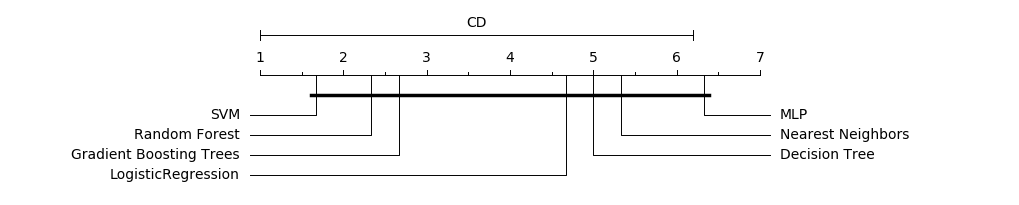

CNNs


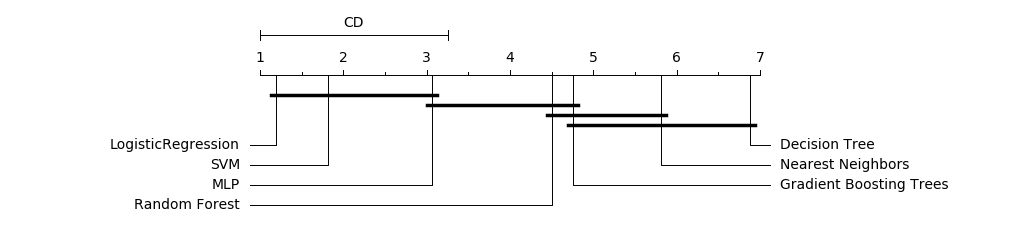

Textures


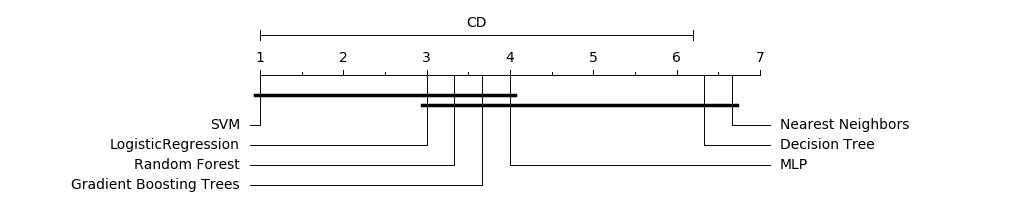

Shapes


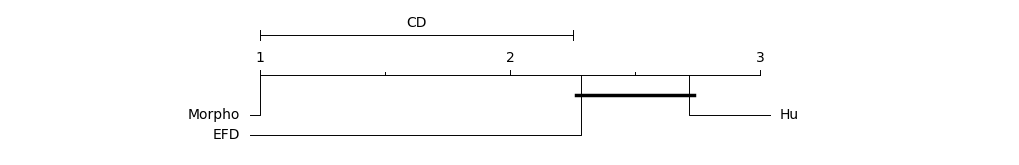

CNNs


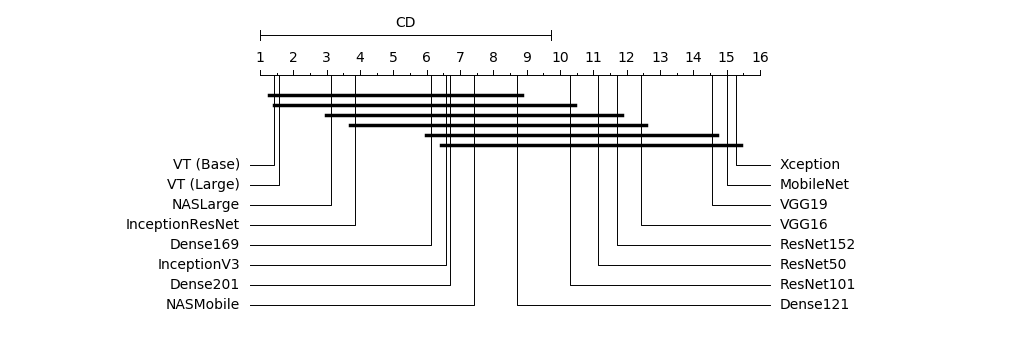

Textures


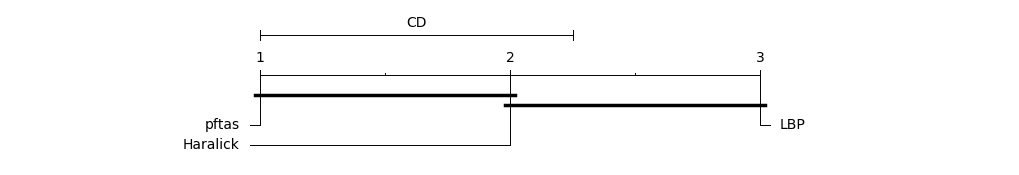

In [58]:
import Orange
import matplotlib.pyplot as plt
'''
Generation of critical distance graphs (post hoc test on rankings)
'''

def show_cd(rank,num_datasets,sufix,width=10):
    #test="bonferroni-dunn"
    test = "nemenyi"
    cd = Orange.evaluation.compute_CD(rank.values, num_datasets ,test=test)
    # print(cd)
    Orange.evaluation.graph_ranks(rank.values, rank.index, cd=cd, width=width, 
                                 #lowv=4, highv=10,
                                  textspace=2.5,
                                  filename=f"nemenyi_{sufix}.pdf")
    plt.show()

print("Shapes")
show_cd(rank_cls(df_shape),get_num_feats(df_shape),"shape_cls")
print("CNNs")
show_cd(rank_cls(df_deep),get_num_feats(df_deep),"cnn_cls")
print("Textures")
show_cd(rank_cls(df_text_trad),get_num_feats(df_text_trad),"textures_cls")

print("Shapes")
show_cd(rank_feats(df_shape),get_num_cls(df_shape),"shape_feat")
print("CNNs")
show_cd(rank_feats(df_deep),get_num_cls(df_deep),"cnn_feat")
print("Textures")
show_cd(rank_feats(df_text_trad),get_num_cls(df_text_trad),"textures_feat")

In [59]:
# Rename pftas to PFTAS
index = df_text_trad.index
indexl = list(index)
indexl[2]="PFTAS"
df_text_trad.index=indexl
df_text_trad

,Gradient Boosting Trees,Nearest Neighbors,LogisticRegression,MLP,SVM,Random Forest,Decision Tree
LBP,0.304169,0.222824,0.281645,0.285388,0.336584,0.318361,0.230338
Haralick,0.407818,0.376307,0.510055,0.391002,0.550814,0.440919,0.379347
PFTAS,0.566096,0.510581,0.600377,0.578638,0.600581,0.561628,0.414297


Textures


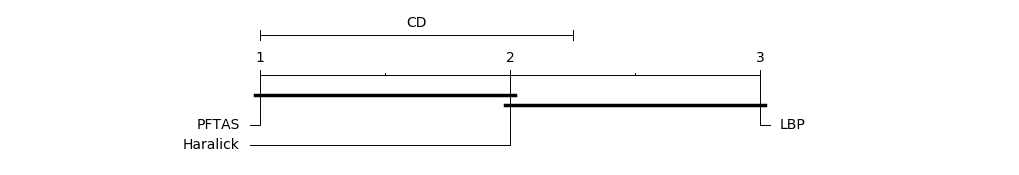

In [60]:
print("Textures")
show_cd(rank_feats(df_text_trad),get_num_cls(df_text_trad),"textures_feat")

In [61]:
# Sort results by category
display(get_best(df_shape))
display(get_best(df_deep))
display(get_best(df_text_trad))

,index,variable,value
12,Morpho,SVM,0.863771
6,Morpho,LogisticRegression,0.808339
15,Morpho,Random Forest,0.790609
16,EFD,Random Forest,0.787835
0,Morpho,Gradient Boosting Trees,0.781318
1,EFD,Gradient Boosting Trees,0.769441
14,Hu,SVM,0.714485
13,EFD,SVM,0.710759
18,Morpho,Decision Tree,0.710687
3,Morpho,Nearest Neighbors,0.709745


,index,variable,value
94,VT (Base),LogisticRegression,0.9788
30,VT (Base),SVM,0.9716
31,VT (Large),SVM,0.9671
95,VT (Large),LogisticRegression,0.9632
62,VT (Base),MLP,0.9359
47,VT (Large),Random Forest,0.9329
63,VT (Large),MLP,0.9326
46,VT (Base),Random Forest,0.9273
14,VT (Base),Nearest Neighbors,0.8951
15,VT (Large),Nearest Neighbors,0.8856


,index,variable,value
14,PFTAS,SVM,0.600581
8,PFTAS,LogisticRegression,0.600377
11,PFTAS,MLP,0.578638
2,PFTAS,Gradient Boosting Trees,0.566096
17,PFTAS,Random Forest,0.561628
13,Haralick,SVM,0.550814
5,PFTAS,Nearest Neighbors,0.510581
7,Haralick,LogisticRegression,0.510055
16,Haralick,Random Forest,0.440919
20,PFTAS,Decision Tree,0.414297


# Application of Bayesian tests.

1 vs 1 model comparisons

In [50]:
#!pip install baycomp

In [63]:
from baycomp import two_on_single

4.0 5.0
0.2950088033437158 0.1319667522617246 0.5730244443945596


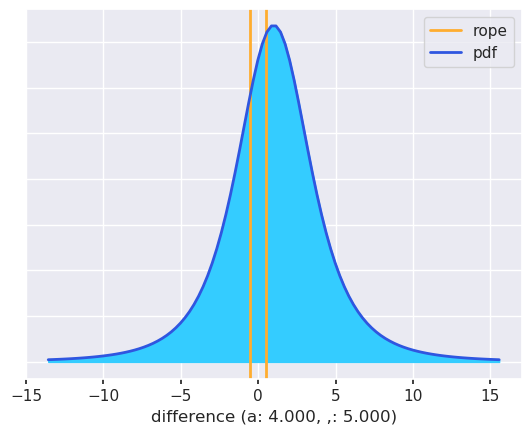

In [64]:
'''
baycomp test tutorial example
'''

x = np.array([4, 2, 6, 4])
y = np.array([5, 7, 3, 5])

names = ("a, b")
print(x.mean(),y.mean())

#two_on_single(x, y, rope=0, runs=1)
((p_left, p_rope, p_right), fig) = two_on_single(x, y, 0.5, 1, plot=True, names=names)
print(p_left, p_rope, p_right)

In [67]:
def get_all_accs(result):
    '''
    Gets all accuracies 
    10 repetions x 10 fold cross validation = 100 values.
      

    Parameters
    ----------
    result: dict
        Results of a certain model


    Return numpy array
    -------
  
    '''     
    accs = []
    for repeticion in result:
        for folds in result[repeticion]:
            y_test,preds = result[repeticion][folds]
            acc = accuracy_score(y_test,preds)
            accs.append(acc)
    return np.array(accs)



Only Shape





In [76]:
results_morpho_svm = get_all_accs(res_dict[('SVM', 'Morpho')])
results_morpho_hu_svm = get_all_accs(res_dict[('SVM', 'Morpho/Hu')])
results_morpho_hu_efd_stack = get_all_accs(res_dict[('(Morpho/Hu/EFD)Stack', 'Morpho/Hu/EFD')])


all_results_trad = [("Morpho-SVM",results_morpho_svm),
               ("Morpho/Hu-SVM",results_morpho_hu_svm),
               ("(Morpho/Hu/EFD)Stack",results_morpho_hu_efd_stack), 
              ]



All 



In [77]:
results_vtbase = get_all_accs(res_dict["vt_base_cls"])
results_vtlarge = get_all_accs(res_dict["vt_large_cls"])
results_vtbase_rl = get_all_accs(res_dict[('LogisticRegression', 'vt_base')])
results_vtbase_morpho_hu_rl = get_all_accs(res_dict[('LogisticRegression', 
                                                     'vt_base/Morpho/Hu')])
results_vtbase_morpho_hu_efd_rl = get_all_accs(res_dict[('LogisticRegression', 
                                                         'vt_base/Morpho/Hu/EFD')])
results_vtbase_morpho_hu_efd_stack = get_all_accs(res_dict[('(vt_base/Morpho/Hu/EFD)Stack', 
                                                         'vt_base/Morpho/Hu/EFD')])




all_results = [("VT_base",results_vtbase),
               ("VT_large",results_vtlarge),
               ("VT(B)-LR",results_vtbase_rl),
               ("(VT(B)/M/H/E)-LR",results_vtbase_morpho_hu_efd_rl), 
               ("(VT(B)/M/H/E)Stack",results_vtbase_morpho_hu_efd_stack)
              ]



All no Delimitation


In [78]:

results_vtbase_nas_rl = get_all_accs(res_dict[('LogisticRegression', 
                                                     'vt_base/NASLarge')])
results_vts_rl = get_all_accs(res_dict[('LogisticRegression', 
                                                     'vt_large/vt_base')])
results_vtbase_nas_stack = get_all_accs(res_dict[('(vt_base/NASLarge)Stack', 
                                                         'vt_base/NASLarge')])




all_results_noD = [("VT_base",results_vtbase),
               ("VT_large",results_vtlarge),
               ("VT(B)",results_vtbase_rl),
               ("(VT(L)/VT(B))-LR",results_vts_rl),
               ("(VT(B)/N)Stack",results_vtbase_nas_stack)
              ] 

In [79]:
plt.rcParams.update({'mathtext.default':  'regular' })

def best_vs_rest(all_results):
    '''
    Draw the graphs of the Bayesian tests used in the article.
      

    Parameters
    ----------
    result: dict
        containing all the results to be compared


    Return numpy array
    -------
  
    '''
    
    dict_test = {}
    color_values = []
    text_values = []
    
    all_results_sorted = sorted(all_results,key = lambda x:x[1].mean() )
    best_name, best_results = all_results_sorted[-1]
    
    cols = []
    
    for  i in range(len(all_results_sorted)-1):
        name_i,results_i = all_results_sorted[i]
        (p_left, p_rope, p_right) = two_on_single(best_results,
                                                  results_i, 
                                                  rope, 10, 
                                                  plot=False, 
                                                  names=(best_name,name_i))
        cols.append(f"{best_name}\n vs \n{name_i}")
        color_values.append(p_left-p_right)
        text_values.append(f"p_left = {round(p_left,2)}\n  p_rope = {round(p_rope,2)}\np_right = {round(p_right,2)}")
        dict_test[name_i]=(p_left, p_rope, p_right)
        # wins, draws, losses
        
    color_values = np.array([color_values])
    text_values = np.array([text_values])
    
    #print(color_values,color_values.shape)
        
    size = 3
    fig, ax = plt.subplots(figsize=(size*(len(all_results)-1),size*0.5))
    heatmap = ax.pcolor(color_values, cmap=plt.cm.RdYlGn,vmin=0, vmax=1)
    for y in range(text_values.shape[0]):
        for x in range(text_values.shape[1]):
            
            if color_values[y][x]<0.5:
                c = "black"
            else:
                c = "white"
            plt.text(x + 0.5, y + 0.5, text_values[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     fontsize=12,
                     fontweight="bold",
                     color = c
                     )
            
           
    
    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(text_values.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(text_values.shape[0]) + 0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_ticks_position('both') # THIS IS THE ONLY CHANGE
    
    ax.set_xticklabels(cols, minor=False, rotation=0,fontsize=12)
    ax.set_yticklabels([""], minor=False)
    
    cbar = plt.colorbar(heatmap)
    cbar.set_label('Probabilities difference') 
    





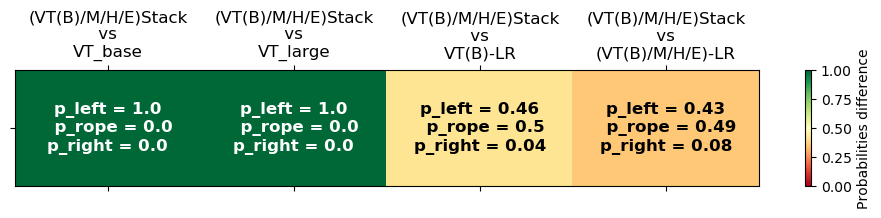

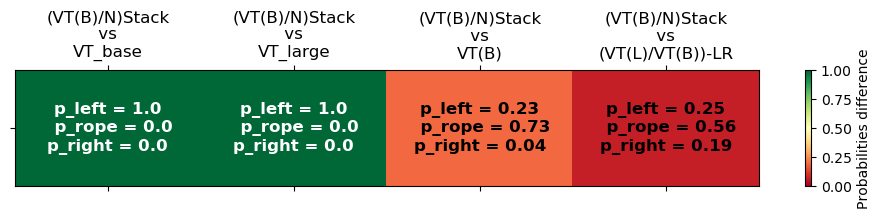

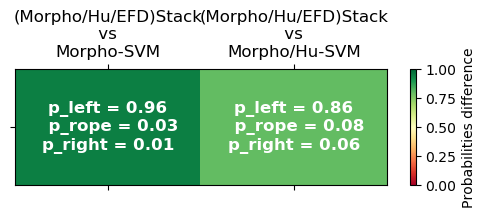

In [80]:
rope = 0.005
best_vs_rest(all_results)
plt.savefig("all_results005.pdf",bbox_inches='tight', pad_inches=0)
best_vs_rest(all_results_noD)
plt.savefig("all_results_noD005.pdf",bbox_inches='tight', pad_inches=0)
best_vs_rest(all_results_trad)
plt.savefig("all_results_trad005.pdf",bbox_inches='tight', pad_inches=0)

------------------------------
------------------------------
------------------------------

------------------------------
------------------------------
------------------------------

------------------------------
------------------------------
------------------------------

------------------------------
------------------------------
------------------------------

Storage of all the results obtained by each method of the study, to be able to be used in future analyzes

In [90]:
def get_all_accs_df(result):
    '''
    Gets all accuracies in a DataFrame (for using with any other tests)
    10 repetions x 10 fold cross validation = 100 values.
      

    Parameters
    ----------
    result: dict
        Results of a certain model


    Return DataFrame
    -------
  
    '''     
    all_accs = []
    for repeticion in result:
        accs = []
        for folds in result[repeticion]:
            y_test,preds = result[repeticion][folds]
            acc = accuracy_score(y_test,preds)
            accs.append(acc)
        all_accs.append(accs)
    df = pd.DataFrame(np.array(all_accs))
    new_col_names = [f"Fold{i}" for i in range(df.shape[1])]
    df.columns = new_col_names
    return df

In [91]:
get_all_accs_df(res_dict["vt_base_cls"])

,Fold0,Fold1,Fold2,Fold3,Fold4,Fold5,Fold6,Fold7,Fold8,Fold9
0,0.790698,0.790698,0.860465,0.767442,0.837209,0.790698,0.860465,0.883721,0.860465,0.880952
1,0.837209,0.837209,0.883721,0.697674,0.790698,0.883721,0.813953,0.813953,0.860465,0.880952
2,0.930233,0.837209,0.860465,0.930233,0.860465,0.883721,0.837209,0.790698,0.697674,0.833333
3,0.860465,0.813953,0.883721,0.674419,0.837209,0.906977,0.837209,0.976744,0.860465,0.880952
4,0.953488,0.837209,0.837209,0.860465,0.790698,0.860465,0.860465,0.860465,0.813953,0.928571
5,0.860465,0.953488,0.860465,0.860465,0.883721,0.883721,0.883721,0.860465,0.813953,0.833333
6,0.906977,0.906977,0.790698,0.860465,0.883721,0.860465,0.790698,0.744186,0.837209,0.809524
7,0.930233,0.883721,0.883721,0.883721,0.674419,0.813953,0.930233,0.883721,0.883721,0.785714
8,0.883721,0.790698,0.837209,0.813953,0.860465,0.837209,0.744186,0.837209,0.883721,0.857143
9,0.906977,0.930233,0.790698,0.906977,0.860465,0.837209,0.767442,0.790698,0.767442,0.857143


In [98]:
for model in res_dict.keys():
    print(model)
    filename = None
    df = get_all_accs_df(res_dict[model])
    if type(model)==tuple:
        if model[0].endswith("Stack"):
            filename = f"10x10_{model[0]}.csv"
        if not "Stack" in model[0]:
            filename = f"10x10_{model[0]}_{model[1]}.csv"
    else:
        filename = f"10x10_{model}.csv"
    df.to_csv(filename)

('Nearest Neighbors', 'LBP')
('SVM', 'LBP')
('MLP', 'LBP')
('LogisticRegression', 'LBP')
('Decision Tree', 'LBP')
('Random Forest', 'LBP')
('Gradient Boosting Trees', 'LBP')
('Nearest Neighbors', 'Morpho')
('SVM', 'Morpho')
('MLP', 'Morpho')
('LogisticRegression', 'Morpho')
('Decision Tree', 'Morpho')
('Random Forest', 'Morpho')
('Gradient Boosting Trees', 'Morpho')
('Nearest Neighbors', 'EFD')
('SVM', 'EFD')
('MLP', 'EFD')
('LogisticRegression', 'EFD')
('Decision Tree', 'EFD')
('Random Forest', 'EFD')
('Gradient Boosting Trees', 'EFD')
('Nearest Neighbors', 'Hu')
('SVM', 'Hu')
('MLP', 'Hu')
('LogisticRegression', 'Hu')
('Decision Tree', 'Hu')
('Random Forest', 'Hu')
('Gradient Boosting Trees', 'Hu')
('Nearest Neighbors', 'Zernike5')
('SVM', 'Zernike5')
('MLP', 'Zernike5')
('LogisticRegression', 'Zernike5')
('Decision Tree', 'Zernike5')
('Random Forest', 'Zernike5')
('Gradient Boosting Trees', 'Zernike5')
('Nearest Neighbors', 'Zernike10')
('SVM', 'Zernike10')
('MLP', 'Zernike10')
('Lo

FileNotFoundError: [Errno 2] No such file or directory: '10x10_Nearest Neighbors_Morpho/Hu.csv'